<a href="https://colab.research.google.com/github/Kimsumin1234/data_analysis/blob/main/5_%EC%A7%80%ED%95%98%EC%B2%A0_%EC%8A%B9%ED%95%98%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 17.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

### 데이터 로드
- sheet_name= : 엑셀 시트 지정(숫자,시트명)
- thousands= : , 제거하기


In [5]:
df_subway = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/2024년 05월  교통카드 통계자료.xls',
                          sheet_name=2,usecols='B,D:H',thousands=',')
df_subway.head()

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차
0,1호선,서울역,1479117,1428188,236809,228836
1,1호선,시청,691098,693899,107105,103074
2,1호선,종각,989168,970072,162080,151268
3,1호선,종로3가,519210,467584,306638,280264
4,1호선,종로5가,490609,478781,268475,260570


### 데이터 탐색

In [6]:
df_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선명     620 non-null    object
 1   지하철역    620 non-null    object
 2   유임승차    620 non-null    int64 
 3   유임하차    620 non-null    int64 
 4   무임승차    620 non-null    int64 
 5   무임하차    620 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 29.2+ KB


In [7]:
# 행,열
df_subway.shape

(620, 6)

In [8]:
# 지하철역 별로 개수 세보기
# 엑셀 데이터에는 620 row 가 있지만 중복인게 있어서 528 이 나온다

df_subway['지하철역'].value_counts()

지하철역
서울역         5
김포공항        4
공덕          4
고속터미널       3
디지털미디어시티    3
           ..
초지          1
고잔          1
중앙          1
한대앞         1
관악산(서울대)    1
Name: count, Length: 528, dtype: int64

### 데이터 분석
- 유임승차비율이 가장 높은 역은?
  - 유임승차비율 = 유임승차 / 무임승차
  - 유임승차비율2 = 유임승차 / (무임승차 + 유임승차)
- 무임승차비율(경로우대)이 가장 높은 역은?

In [9]:
# 유임승차비율

df_subway['유임승차비율'] = round(df_subway['유임승차'] / df_subway['무임승차'],1)
df_subway.head()

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율
0,1호선,서울역,1479117,1428188,236809,228836,6.2
1,1호선,시청,691098,693899,107105,103074,6.5
2,1호선,종각,989168,970072,162080,151268,6.1
3,1호선,종로3가,519210,467584,306638,280264,1.7
4,1호선,종로5가,490609,478781,268475,260570,1.8


In [10]:
df_subway.sort_values('유임승차비율',ascending=False)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율
192,경원선,창동,90,0,0,0,inf
335,경의선,검암,1,0,0,0,inf
334,경의선,계양,6,0,0,0,inf
525,7호선,부평구청,1,0,0,0,inf
269,일산선,지축,67,0,1,0,67.0
...,...,...,...,...,...,...,...
299,중앙선,지평,885,1177,1239,1289,0.7
297,중앙선,원덕,5317,5167,7501,7241,0.7
329,경의선,운천,83,28,148,117,0.6
211,경원선,연천,15139,14641,30962,32183,0.5


In [11]:
# 0 으로 나눠서 inf(인피니트) 가 뜸
# 유임승차비율 != inf & 유임승차비율 > 0

condition = (df_subway['유임승차비율'] != np.inf) & (df_subway['유임승차비율'] > 0)
condition

0      True
1      True
2      True
3      True
4      True
       ... 
615    True
616    True
617    True
618    True
619    True
Name: 유임승차비율, Length: 620, dtype: bool

In [12]:
# 호선명, 지하철역, 유임승차비율, 내림차순
# 지축역이 제일 높게 나왓지만 실제로는 지축역이 유임승차 인원이 67명 밖에 안되서 실뢰도가 적다

df_subway.loc[condition,['호선명','지하철역','유임승차비율']].sort_values('유임승차비율',ascending=False)

,호선명,지하철역,유임승차비율
269,일산선,지축,67.0
240,분당선,복정,64.0
72,3호선,충무로,34.7
18,2호선,한양대,26.3
448,6호선,연신내,26.0
...,...,...,...
299,중앙선,지평,0.7
297,중앙선,원덕,0.7
329,경의선,운천,0.6
211,경원선,연천,0.5


In [13]:
# 유임승차 인원이 10000 이상 인걸로

condition = (df_subway['유임승차비율'] != np.inf) & (df_subway['유임승차'] > 10000)
condition

0      True
1      True
2      True
3      True
4      True
       ... 
615    True
616    True
617    True
618    True
619    True
Length: 620, dtype: bool

In [14]:
df_subway.loc[condition,['호선명','지하철역','유임승차비율']].sort_values('유임승차비율',ascending=False)

,호선명,지하철역,유임승차비율
18,2호선,한양대,26.3
571,공항철도 1호선,홍대입구,20.6
48,2호선,홍대입구,20.5
465,6호선,한강진,15.7
120,경부선,서울역,15.3
...,...,...,...
7,1호선,제기동,0.9
602,우이신설선,삼양사거리,0.9
298,중앙선,용문,0.8
211,경원선,연천,0.5


In [15]:
# 유임승차비율2

df_subway['유임승차비율2'] = round(df_subway['유임승차'] / (df_subway['무임승차']+df_subway['유임승차'])*100,1)
df_subway.head()

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
0,1호선,서울역,1479117,1428188,236809,228836,6.2,86.2
1,1호선,시청,691098,693899,107105,103074,6.5,86.6
2,1호선,종각,989168,970072,162080,151268,6.1,85.9
3,1호선,종로3가,519210,467584,306638,280264,1.7,62.9
4,1호선,종로5가,490609,478781,268475,260570,1.8,64.6


In [16]:
df_subway.sort_values('유임승차비율2',ascending=False).head(10)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
335,경의선,검암,1,0,0,0,inf,100.0
192,경원선,창동,90,0,0,0,inf,100.0
525,7호선,부평구청,1,0,0,0,inf,100.0
334,경의선,계양,6,0,0,0,inf,100.0
269,일산선,지축,67,0,1,0,67.0,98.5
240,분당선,복정,192,0,3,0,64.0,98.5
72,3호선,충무로,312,0,9,0,34.7,97.2
448,6호선,연신내,104,0,4,0,26.0,96.3
18,2호선,한양대,385782,435583,14645,15699,26.3,96.3
571,공항철도 1호선,홍대입구,463385,446277,22461,20736,20.6,95.4


In [17]:
# 유임승차 인원이 10000 이상 인걸로

condition2 = df_subway['유임승차'] > 10000

df_subway.loc[condition2,['호선명','지하철역','유임승차비율2']].sort_values('유임승차비율2',ascending=False)

,호선명,지하철역,유임승차비율2
18,2호선,한양대,96.3
48,2호선,홍대입구,95.4
571,공항철도 1호선,홍대입구,95.4
465,6호선,한강진,94.0
120,경부선,서울역,93.9
...,...,...,...
602,우이신설선,삼양사거리,48.7
7,1호선,제기동,46.8
298,중앙선,용문,45.2
211,경원선,연천,32.8


In [18]:
# 무임승차비율이 가장 높은 곳은?
# 유임승차비율 오름차순을 하면된다

df_subway.loc[condition2].sort_values('유임승차비율2').head(10)

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
208,경원선,소요산,16264,16382,50893,49270,0.3,24.2
211,경원선,연천,15139,14641,30962,32183,0.5,32.8
298,중앙선,용문,36954,36874,44852,44476,0.8,45.2
7,1호선,제기동,249016,238896,283615,303596,0.9,46.8
602,우이신설선,삼양사거리,40067,39989,42209,41806,0.9,48.7
9,1호선,동묘앞,176547,186029,175272,177168,1.0,50.2
290,중앙선,운길산,15519,14787,15215,15463,1.0,50.5
601,우이신설선,삼양,33523,33645,31311,34004,1.1,51.7
195,경원선,도봉산,144216,83656,133905,105998,1.1,51.9
608,우이신설선,신설동,38250,38189,35088,30923,1.1,52.2


- 유무임 승하차 인원이 가장 많은 역?

In [19]:
# 유임승차가 가장 많은 역

# df_subway.sort_values('유임승차',ascending=False).head(1)
df_subway[df_subway['유임승차'].max() == df_subway['유임승차']]

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
25,2호선,잠실(송파구청),2255264,2218730,236852,224844,9.5,90.5


In [20]:
# 유임승차가 가장 적은 역

df_subway[df_subway['유임승차'].min() == df_subway['유임승차']]

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
335,경의선,검암,1,0,0,0,inf,100.0
525,7호선,부평구청,1,0,0,0,inf,100.0


In [21]:
# 유임하차 인원이 가장 많은 역

df_subway[df_subway['유임하차'].max() == df_subway['유임하차']]

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
48,2호선,홍대입구,2181301,2370397,106253,103537,20.5,95.4


In [22]:
# 무임승하차 인원이 가장 많은 역

df_subway[df_subway['무임승차'].max() == df_subway['무임승차']]

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
125,경부선,영등포,1008266,1032273,317526,317116,3.2,76.1


In [23]:
df_subway[df_subway['무임하차'].max() == df_subway['무임하차']]

,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,유임승차비율,유임승차비율2
125,경부선,영등포,1008266,1032273,317526,317116,3.2,76.1


### 시각화

In [24]:
# 유임승차 >= 1000000
condition = df_subway['유임승차'] >= 1000000
df_chart = df_subway.loc[condition,['지하철역','유임승차','유임하차','무임승차','무임하차']].copy()
df_chart

,지하철역,유임승차,유임하차,무임승차,무임하차
0,서울역,1479117,1428188,236809,228836
11,을지로입구,1319969,1355563,107082,99955
20,성수,1185919,1320446,106377,106981
21,건대입구,1088906,1138735,102314,105211
25,잠실(송파구청),2255264,2218730,236852,224844
28,삼성(무역센터),1459592,1479135,130918,120896
29,선릉,1332850,1177675,243916,214345
30,역삼,1204540,1390728,146474,150501
31,강남,2170143,2132649,168661,147481
35,사당,1022169,1138461,227346,219041


In [25]:
df_chart.head()

,지하철역,유임승차,유임하차,무임승차,무임하차
0,서울역,1479117,1428188,236809,228836
11,을지로입구,1319969,1355563,107082,99955
20,성수,1185919,1320446,106377,106981
21,건대입구,1088906,1138735,102314,105211
25,잠실(송파구청),2255264,2218730,236852,224844


- 지하철역을 컬럼으로 만들기(행,열 바꾸기)

In [26]:
df_chart.set_index('지하철역')

,유임승차,유임하차,무임승차,무임하차
지하철역,,,,
서울역,1479117,1428188,236809,228836
을지로입구,1319969,1355563,107082,99955
성수,1185919,1320446,106377,106981
건대입구,1088906,1138735,102314,105211
잠실(송파구청),2255264,2218730,236852,224844
삼성(무역센터),1459592,1479135,130918,120896
선릉,1332850,1177675,243916,214345
역삼,1204540,1390728,146474,150501
강남,2170143,2132649,168661,147481


In [27]:
df_chart = df_chart.set_index('지하철역').T
df_chart

지하철역,서울역,을지로입구,성수,건대입구,잠실(송파구청),삼성(무역센터),선릉,역삼,강남,사당,...,구로디지털단지,신도림,홍대입구,신촌,고속터미널,혜화,용산,영등포,수원,가산디지털단지
유임승차,1479117,1319969,1185919,1088906,2255264,1459592,1332850,1204540,2170143,1022169,...,1453390,1300773,2181301,1111202,1403525,1018528,1215040,1008266,1152444,1070189
유임하차,1428188,1355563,1320446,1138735,2218730,1479135,1177675,1390728,2132649,1138461,...,1430847,1288214,2370397,1149712,1312101,1033236,1228962,1032273,1215503,1077544
무임승차,236809,107082,106377,102314,236852,130918,243916,146474,168661,227346,...,212388,245096,106253,129319,238488,134994,155789,317526,180778,103569
무임하차,228836,99955,106981,105211,224844,120896,214345,150501,147481,219041,...,212157,231035,103537,126926,223509,132754,154078,317116,182999,98730


- pandas 로 차트 그리기

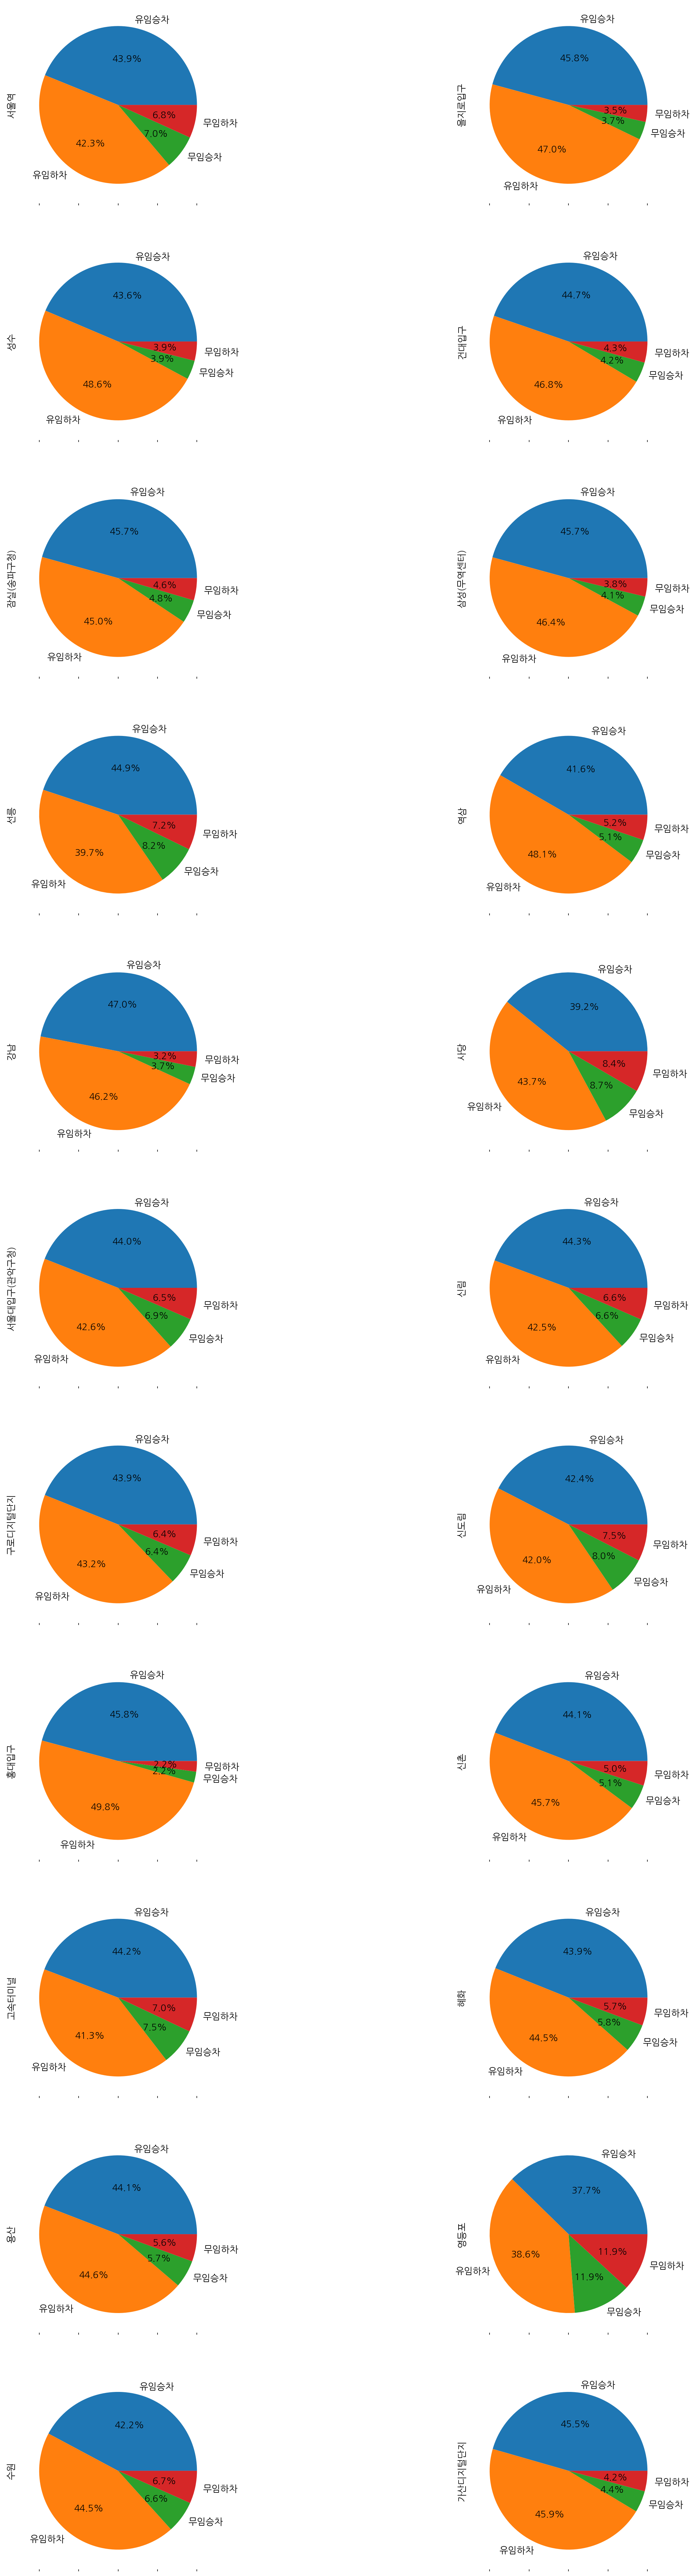

In [28]:
# 차트 간단하게 그리는거는 pandas, seaborn 사용이 편하지만
# 차트를 세세하게 설정하려면 matplotlib 을 사용해야 한다
# layout= : 행,열

df_chart.plot.pie(subplots=True, layout=(11,2), autopct='%.1f%%', legend=False, figsize=(16,50));

### 시간대별 시트 데이터 가져오기

In [29]:
# 호선명, 지하철역, 4:00 ~ 24:00

df_time = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/2024년 05월  교통카드 통계자료.xls',
                          sheet_name=3,usecols='B,D,E:AT',thousands=',',skiprows=1)
df_time.head()

,Unnamed: 1,Unnamed: 3,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,...,승차.16,하차.16,승차.17,하차.17,승차.18,하차.18,승차.19,하차.19,승차.20,하차.20
0,1호선,서울역,712,15,8896,9542,14747,61682,43154,122280,...,91062,53023,94433,49173,62106,33456,30783,16695,3655,4788
1,1호선,시청,106,2,2365,5549,4256,27042,8011,75120,...,60184,11419,56661,9962,34372,7292,11310,4696,623,1156
2,1호선,종각,154,3,4348,5805,4534,33873,7478,114857,...,88518,14902,94549,11103,66342,7991,29575,5499,2053,1464
3,1호선,종로3가,194,7,4294,2708,4106,14292,6284,29101,...,54181,14575,57716,11432,44832,8986,21757,5957,2307,2498
4,1호선,종로5가,53,1,2233,3786,3435,18472,6016,44110,...,38774,11940,34722,8514,22492,6320,6968,4295,415,1280


### 데이터 전처리
- 컬럼명 변경
  - 호선명, 지하철역, 승차_4, 하차_4 ... 하차_24

In [30]:
# 컬럼명 변경

list1=['호선명','지하철역']

for i in range(4,25):
  list1.append('승차_'+str(i))
  list1.append('하차_'+str(i))

list1

['호선명',
 '지하철역',
 '승차_4',
 '하차_4',
 '승차_5',
 '하차_5',
 '승차_6',
 '하차_6',
 '승차_7',
 '하차_7',
 '승차_8',
 '하차_8',
 '승차_9',
 '하차_9',
 '승차_10',
 '하차_10',
 '승차_11',
 '하차_11',
 '승차_12',
 '하차_12',
 '승차_13',
 '하차_13',
 '승차_14',
 '하차_14',
 '승차_15',
 '하차_15',
 '승차_16',
 '하차_16',
 '승차_17',
 '하차_17',
 '승차_18',
 '하차_18',
 '승차_19',
 '하차_19',
 '승차_20',
 '하차_20',
 '승차_21',
 '하차_21',
 '승차_22',
 '하차_22',
 '승차_23',
 '하차_23',
 '승차_24',
 '하차_24']

In [31]:
df_time.columns = list1

df_time.head()

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_20,하차_20,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24
0,1호선,서울역,712,15,8896,9542,14747,61682,43154,122280,...,91062,53023,94433,49173,62106,33456,30783,16695,3655,4788
1,1호선,시청,106,2,2365,5549,4256,27042,8011,75120,...,60184,11419,56661,9962,34372,7292,11310,4696,623,1156
2,1호선,종각,154,3,4348,5805,4534,33873,7478,114857,...,88518,14902,94549,11103,66342,7991,29575,5499,2053,1464
3,1호선,종로3가,194,7,4294,2708,4106,14292,6284,29101,...,54181,14575,57716,11432,44832,8986,21757,5957,2307,2498
4,1호선,종로5가,53,1,2233,3786,3435,18472,6016,44110,...,38774,11940,34722,8514,22492,6320,6968,4295,415,1280


## 분석
- 출근 시간대(7~9) 사람들이 가장 많이 타는 역 찾기

In [32]:
# df_time['출근 계'],df_time['하차 계']
df_time['출근 계'] = df_time['승차_7'] + df_time['승차_8'] + df_time['승차_9']
df_time['하차 계'] = df_time['하차_7'] + df_time['하차_8'] + df_time['하차_9']

In [33]:
df_time[df_time['출근 계'].max() == df_time['출근 계']]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,출근 계,하차 계
39,2호선,신림,217,5,39624,4285,72112,18451,184578,29861,...,44869,123630,37752,115187,22235,74882,4587,24826,617864,120512


In [34]:
df_time[df_time['하차 계'].max() == df_time['하차 계']]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,출근 계,하차 계
30,2호선,역삼,55,1,3902,7881,9260,41795,16692,157268,...,77816,20958,53189,17724,21018,11143,3622,3564,68880,816320


- 특정 시간대 사람들이 가장 많이 타는 역 알아보기

In [36]:
# 밤 11시 에 가장 혼잡한 역은? (승차)

df_time.columns

Index(['호선명', '지하철역', '승차_4', '하차_4', '승차_5', '하차_5', '승차_6', '하차_6', '승차_7',
       '하차_7', '승차_8', '하차_8', '승차_9', '하차_9', '승차_10', '하차_10', '승차_11',
       '하차_11', '승차_12', '하차_12', '승차_13', '하차_13', '승차_14', '하차_14', '승차_15',
       '하차_15', '승차_16', '하차_16', '승차_17', '하차_17', '승차_18', '하차_18', '승차_19',
       '하차_19', '승차_20', '하차_20', '승차_21', '하차_21', '승차_22', '하차_22', '승차_23',
       '하차_23', '승차_24', '하차_24', '출근 계', '하차 계'],
      dtype='object')

In [37]:
df_time[df_time['승차_23'].max() == df_time['승차_23']]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,출근 계,하차 계
48,2호선,홍대입구,1129,24,31942,3858,33706,19834,63208,43832,...,207273,96102,200274,81477,105230,59995,14242,21542,211901,311144


In [55]:
# 1 : 승차_12 , 23 : 승차_23
# 2 + (승차시각 - 4) * 2
# 승차_4 부터 있음
idx = 4
idx = 2 + (idx - 4) * 2

df_time.iloc[:,idx]

0      712
1      106
2      154
3      194
4       53
      ... 
615      0
616      1
617      2
618     13
619      2
Name: 승차_4, Length: 620, dtype: int64

In [59]:
answer = int(input('승차 인원이 궁금한 시간을 입력해 주세요(24시간)'))

idx = 2 + (answer - 4) * 2

str1 = df_time.iloc[:,idx]

df_time[str1.max() == str1]

승차 인원이 궁금한 시간을 입력해 주세요(24시간)18


,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,출근 계,하차 계
31,2호선,강남,202,7,8610,12221,18832,57752,41262,161939,...,188088,52670,163006,44364,75548,26529,13011,7303,161461,791010


- 시간대별로 사람들이 가장 많이 타고 내리는 역은?

In [76]:
# 5시에 가장많은 승차인원의 인덱스?

# 최대 승차인원
# df_time['승차_5'].max()
max(df_time['승차_5'])

# idxmax() : 컬럼에서 가장 높은 행의 인덱스를 돌려줌
max_idx = df_time['승차_5'].idxmax()
max_idx

162

In [78]:
df_time.iloc[max_idx]['지하철역']

'부천'

In [81]:
# 필요없는 칼럼 제외 : df_time.columns.difference()
# sort=False : 정렬 하지마시오

groups_col = df_time.columns.difference(['호선명','지하철역','출근 계','하차 계'], sort=False)
groups_col

Index(['승차_4', '하차_4', '승차_5', '하차_5', '승차_6', '하차_6', '승차_7', '하차_7', '승차_8',
       '하차_8', '승차_9', '하차_9', '승차_10', '하차_10', '승차_11', '하차_11', '승차_12',
       '하차_12', '승차_13', '하차_13', '승차_14', '하차_14', '승차_15', '하차_15', '승차_16',
       '하차_16', '승차_17', '하차_17', '승차_18', '하차_18', '승차_19', '하차_19', '승차_20',
       '하차_20', '승차_21', '하차_21', '승차_22', '하차_22', '승차_23', '하차_23', '승차_24',
       '하차_24'],
      dtype='object')

In [83]:
# 시간대별 가장많은 승차인원의 인덱스 추출

idx_max = df_time[groups_col].idxmax().to_list()
idx_max

[128,
 125,
 162,
 31,
 39,
 0,
 39,
 31,
 39,
 520,
 39,
 31,
 39,
 31,
 25,
 48,
 25,
 48,
 25,
 48,
 25,
 48,
 25,
 48,
 25,
 48,
 31,
 48,
 31,
 25,
 31,
 39,
 48,
 39,
 48,
 39,
 48,
 39,
 48,
 39,
 48,
 39]

In [84]:
# 각 시간대 최대 승하차 인원 추출

passenger_max = df_time[groups_col].max().to_list()
passenger_max

[12967,
 131,
 42292,
 12221,
 72112,
 61682,
 184578,
 161939,
 265768,
 380181,
 167518,
 318183,
 97020,
 154527,
 91575,
 141804,
 103758,
 164121,
 114908,
 178801,
 125195,
 167810,
 156479,
 168933,
 178461,
 178879,
 250437,
 209911,
 320114,
 251235,
 212568,
 183529,
 179144,
 123872,
 207273,
 123630,
 200274,
 115187,
 105230,
 74882,
 14242,
 24826]

In [85]:
# 데이터 프레임으로 생성

data = {
    '승하차':groups_col,
    'idx_max':idx_max,
    '승객수':passenger_max
}

df_passenger_max_time = pd.DataFrame(data)
df_passenger_max_time.head()

,승하차,idx_max,승객수
0,승차_4,128,12967
1,하차_4,125,131
2,승차_5,162,42292
3,하차_5,31,12221
4,승차_6,39,72112


In [89]:
# 지하철역 추가

# df_passenger_max_time['지하철역'] = df_time.iloc[idx_max,'지하철역'].to_list()
df_passenger_max_time['지하철역'] = df_time.loc[idx_max,'지하철역'].to_list()

In [91]:
df_passenger_max_time.head()

,승하차,idx_max,승객수,지하철역
0,승차_4,128,12967,구로
1,하차_4,125,131,영등포
2,승차_5,162,42292,부천
3,하차_5,31,12221,강남
4,승차_6,39,72112,신림


### 시각화

In [104]:
# 승하차 컬럼에서 숫자만 잘라내기
# split(expand=True) : 잘라낸걸 가지고 알아서 데이터 프레임으로 만들어준다

df_passenger_max_time['승하차'].str.split('_',expand=True)

,0,1
0,승차,4
1,하차,4
2,승차,5
3,하차,5
4,승차,6
5,하차,6
6,승차,7
7,하차,7
8,승차,8
9,하차,8


In [105]:
df_passenger_max_time['hour'] = df_passenger_max_time['승하차'].str.split('_',expand=True)[1]
df_passenger_max_time.head()

,승하차,idx_max,승객수,지하철역,hour
0,승차_4,128,12967,구로,4
1,하차_4,125,131,영등포,4
2,승차_5,162,42292,부천,5
3,하차_5,31,12221,강남,5
4,승차_6,39,72112,신림,6


In [108]:
# 혼잡역 컬럼 생성 : 지하철역_hour 이런식으로 나오게끔

# df_passenger_max_time.info()
df_passenger_max_time['혼잡역'] = df_passenger_max_time['지하철역'] + '_' + df_passenger_max_time['hour']
df_passenger_max_time.head()

,승하차,idx_max,승객수,지하철역,hour,혼잡역
0,승차_4,128,12967,구로,4,구로_4
1,하차_4,125,131,영등포,4,영등포_4
2,승차_5,162,42292,부천,5,부천_5
3,하차_5,31,12221,강남,5,강남_5
4,승차_6,39,72112,신림,6,신림_6


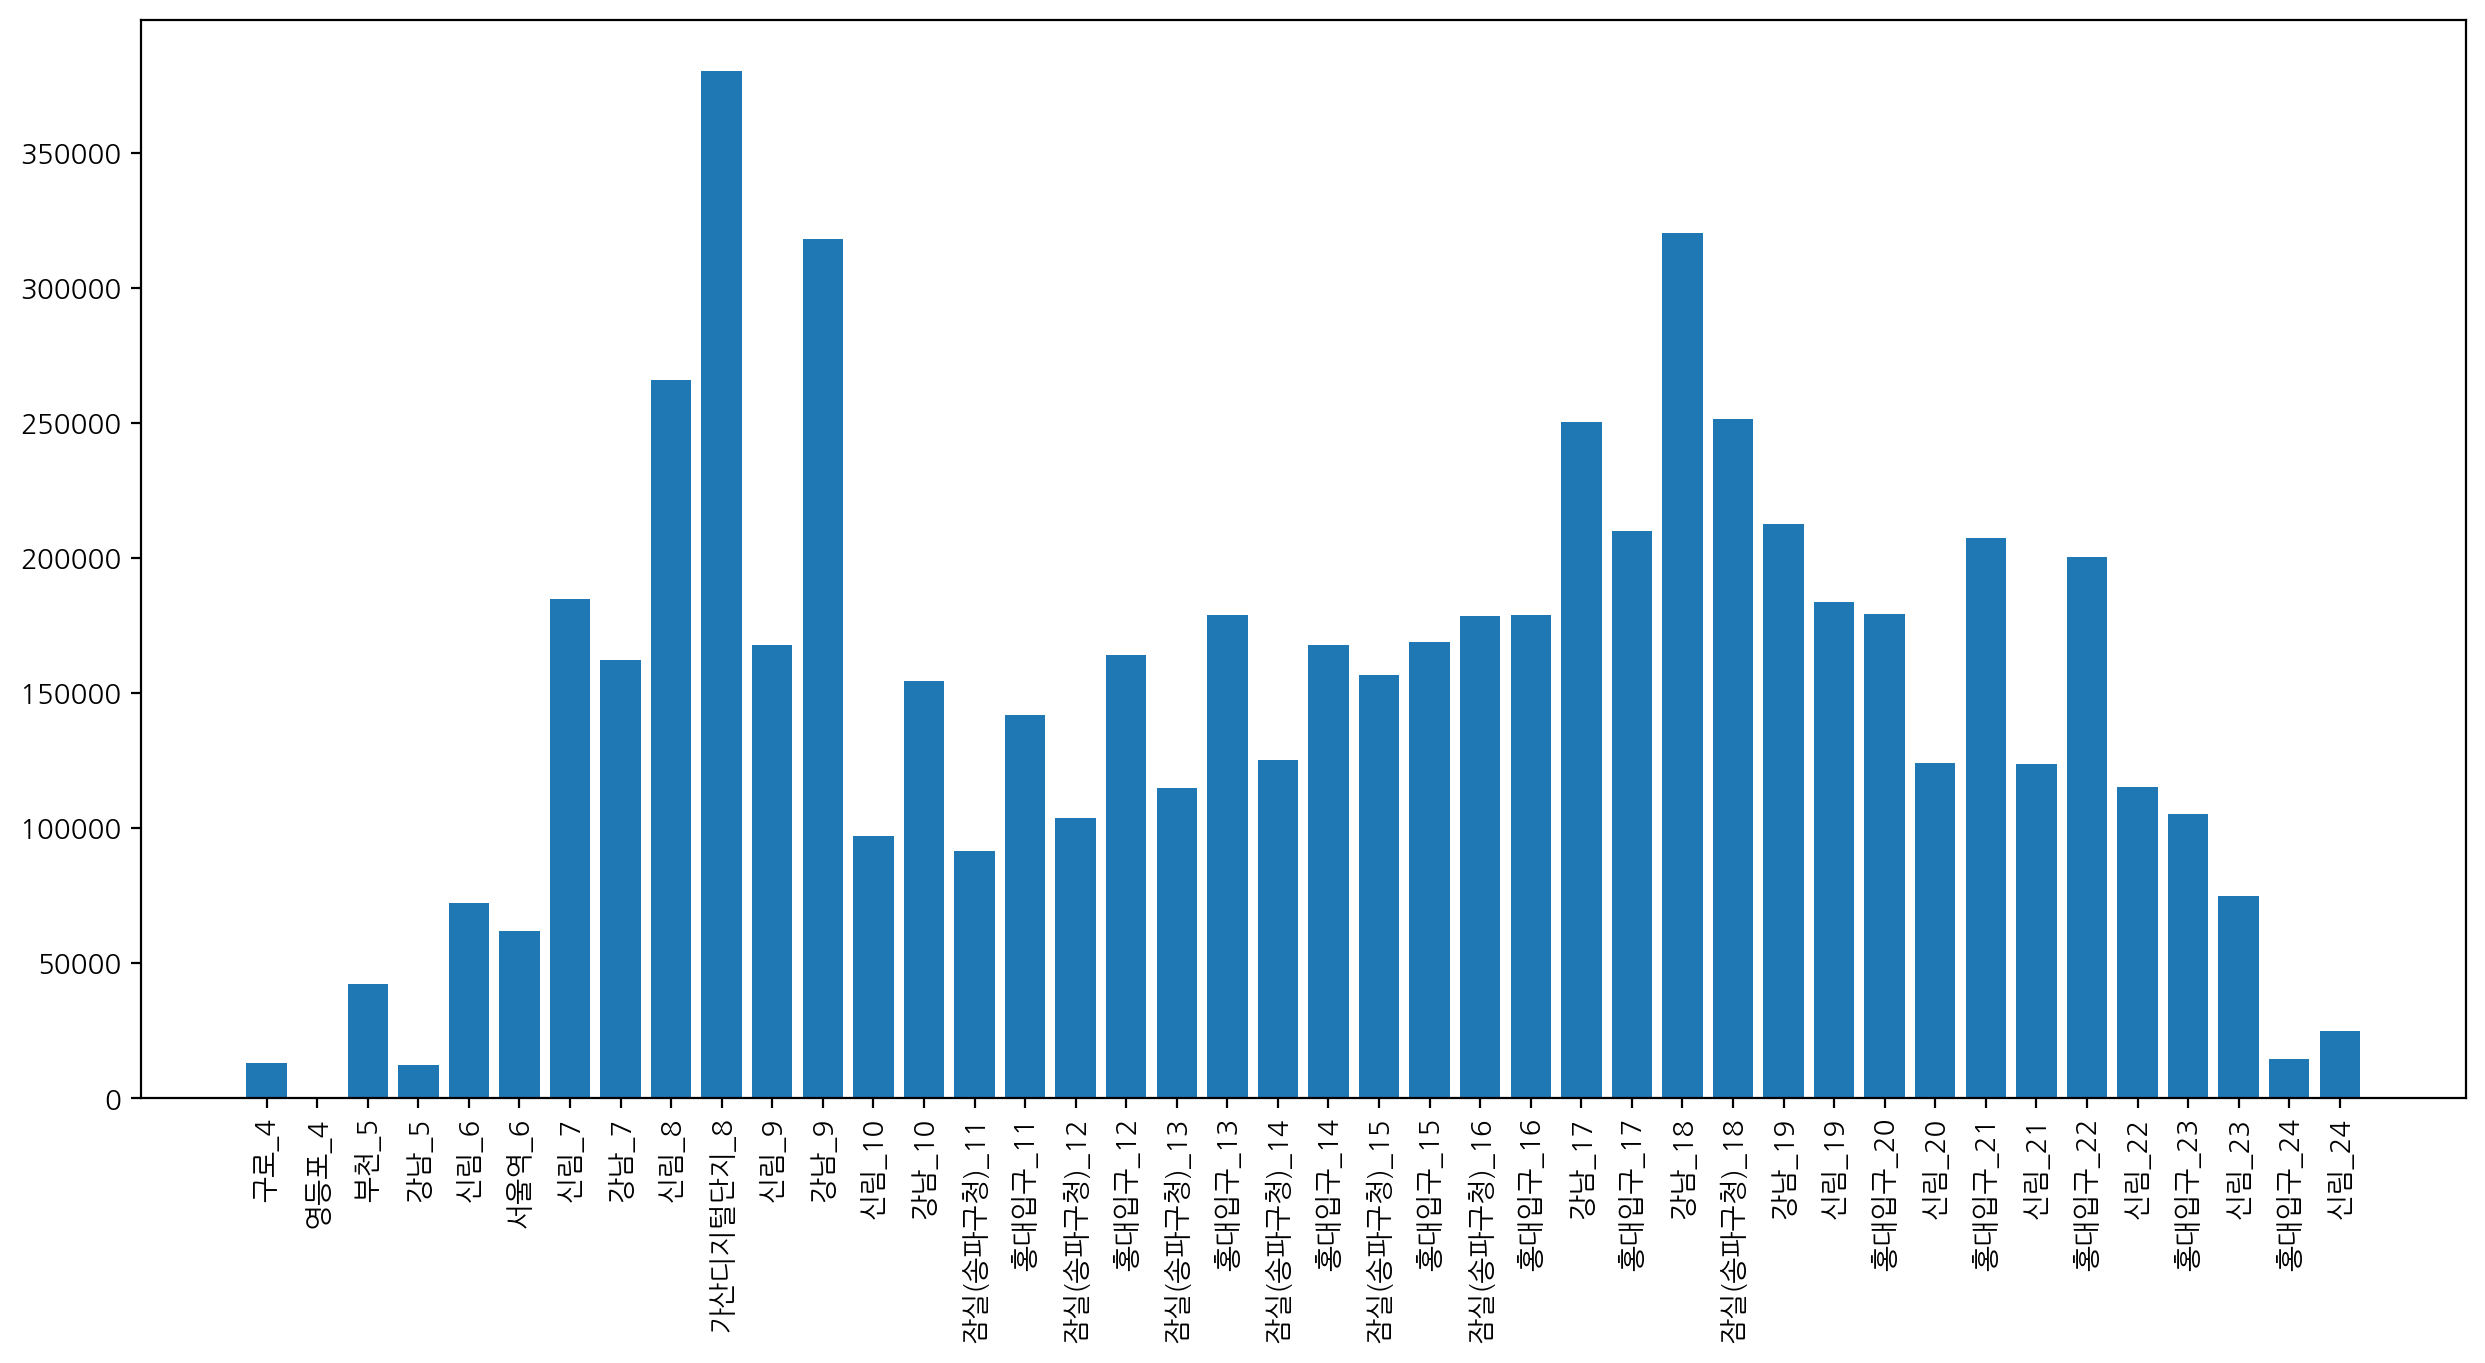

In [114]:
# 차트 그리기
# x축 : 혼잡역 , y축 : 승객수

plt.figure(figsize=(15,7))
plt.bar(df_passenger_max_time['혼잡역'],df_passenger_max_time['승객수'])
plt.xticks(rotation=90);

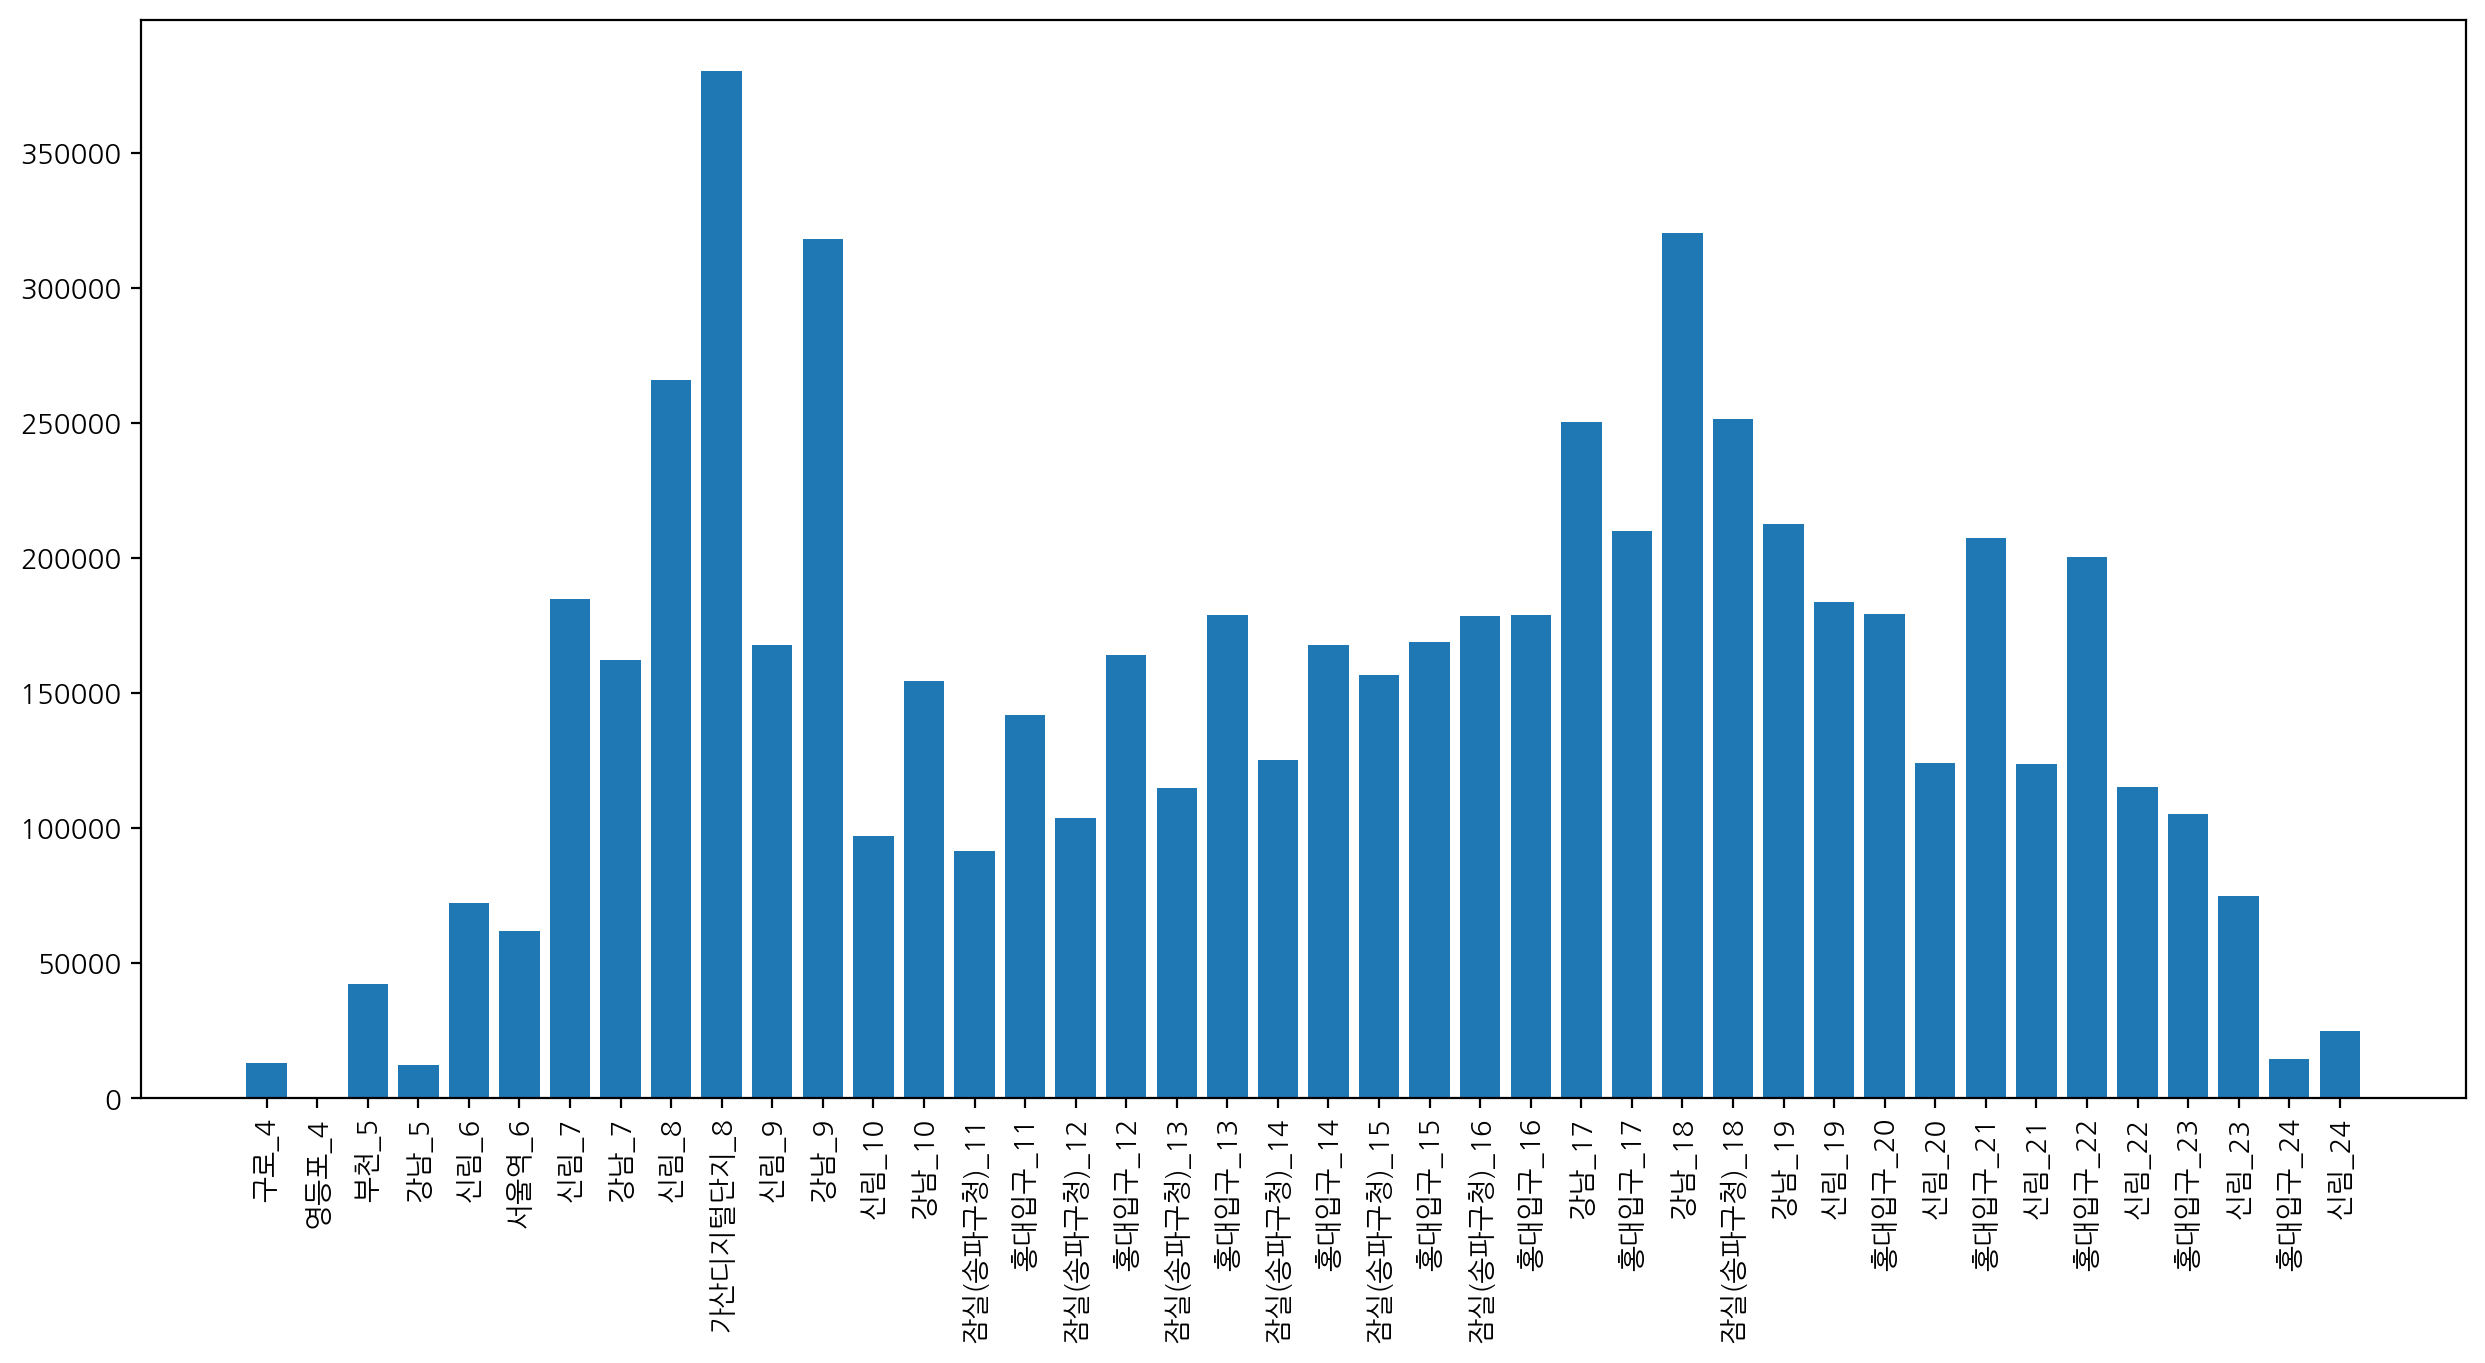

In [115]:
plt.figure(figsize=(15,7))
plt.bar(x='혼잡역',height='승객수',data=df_passenger_max_time)
plt.xticks(rotation=90);

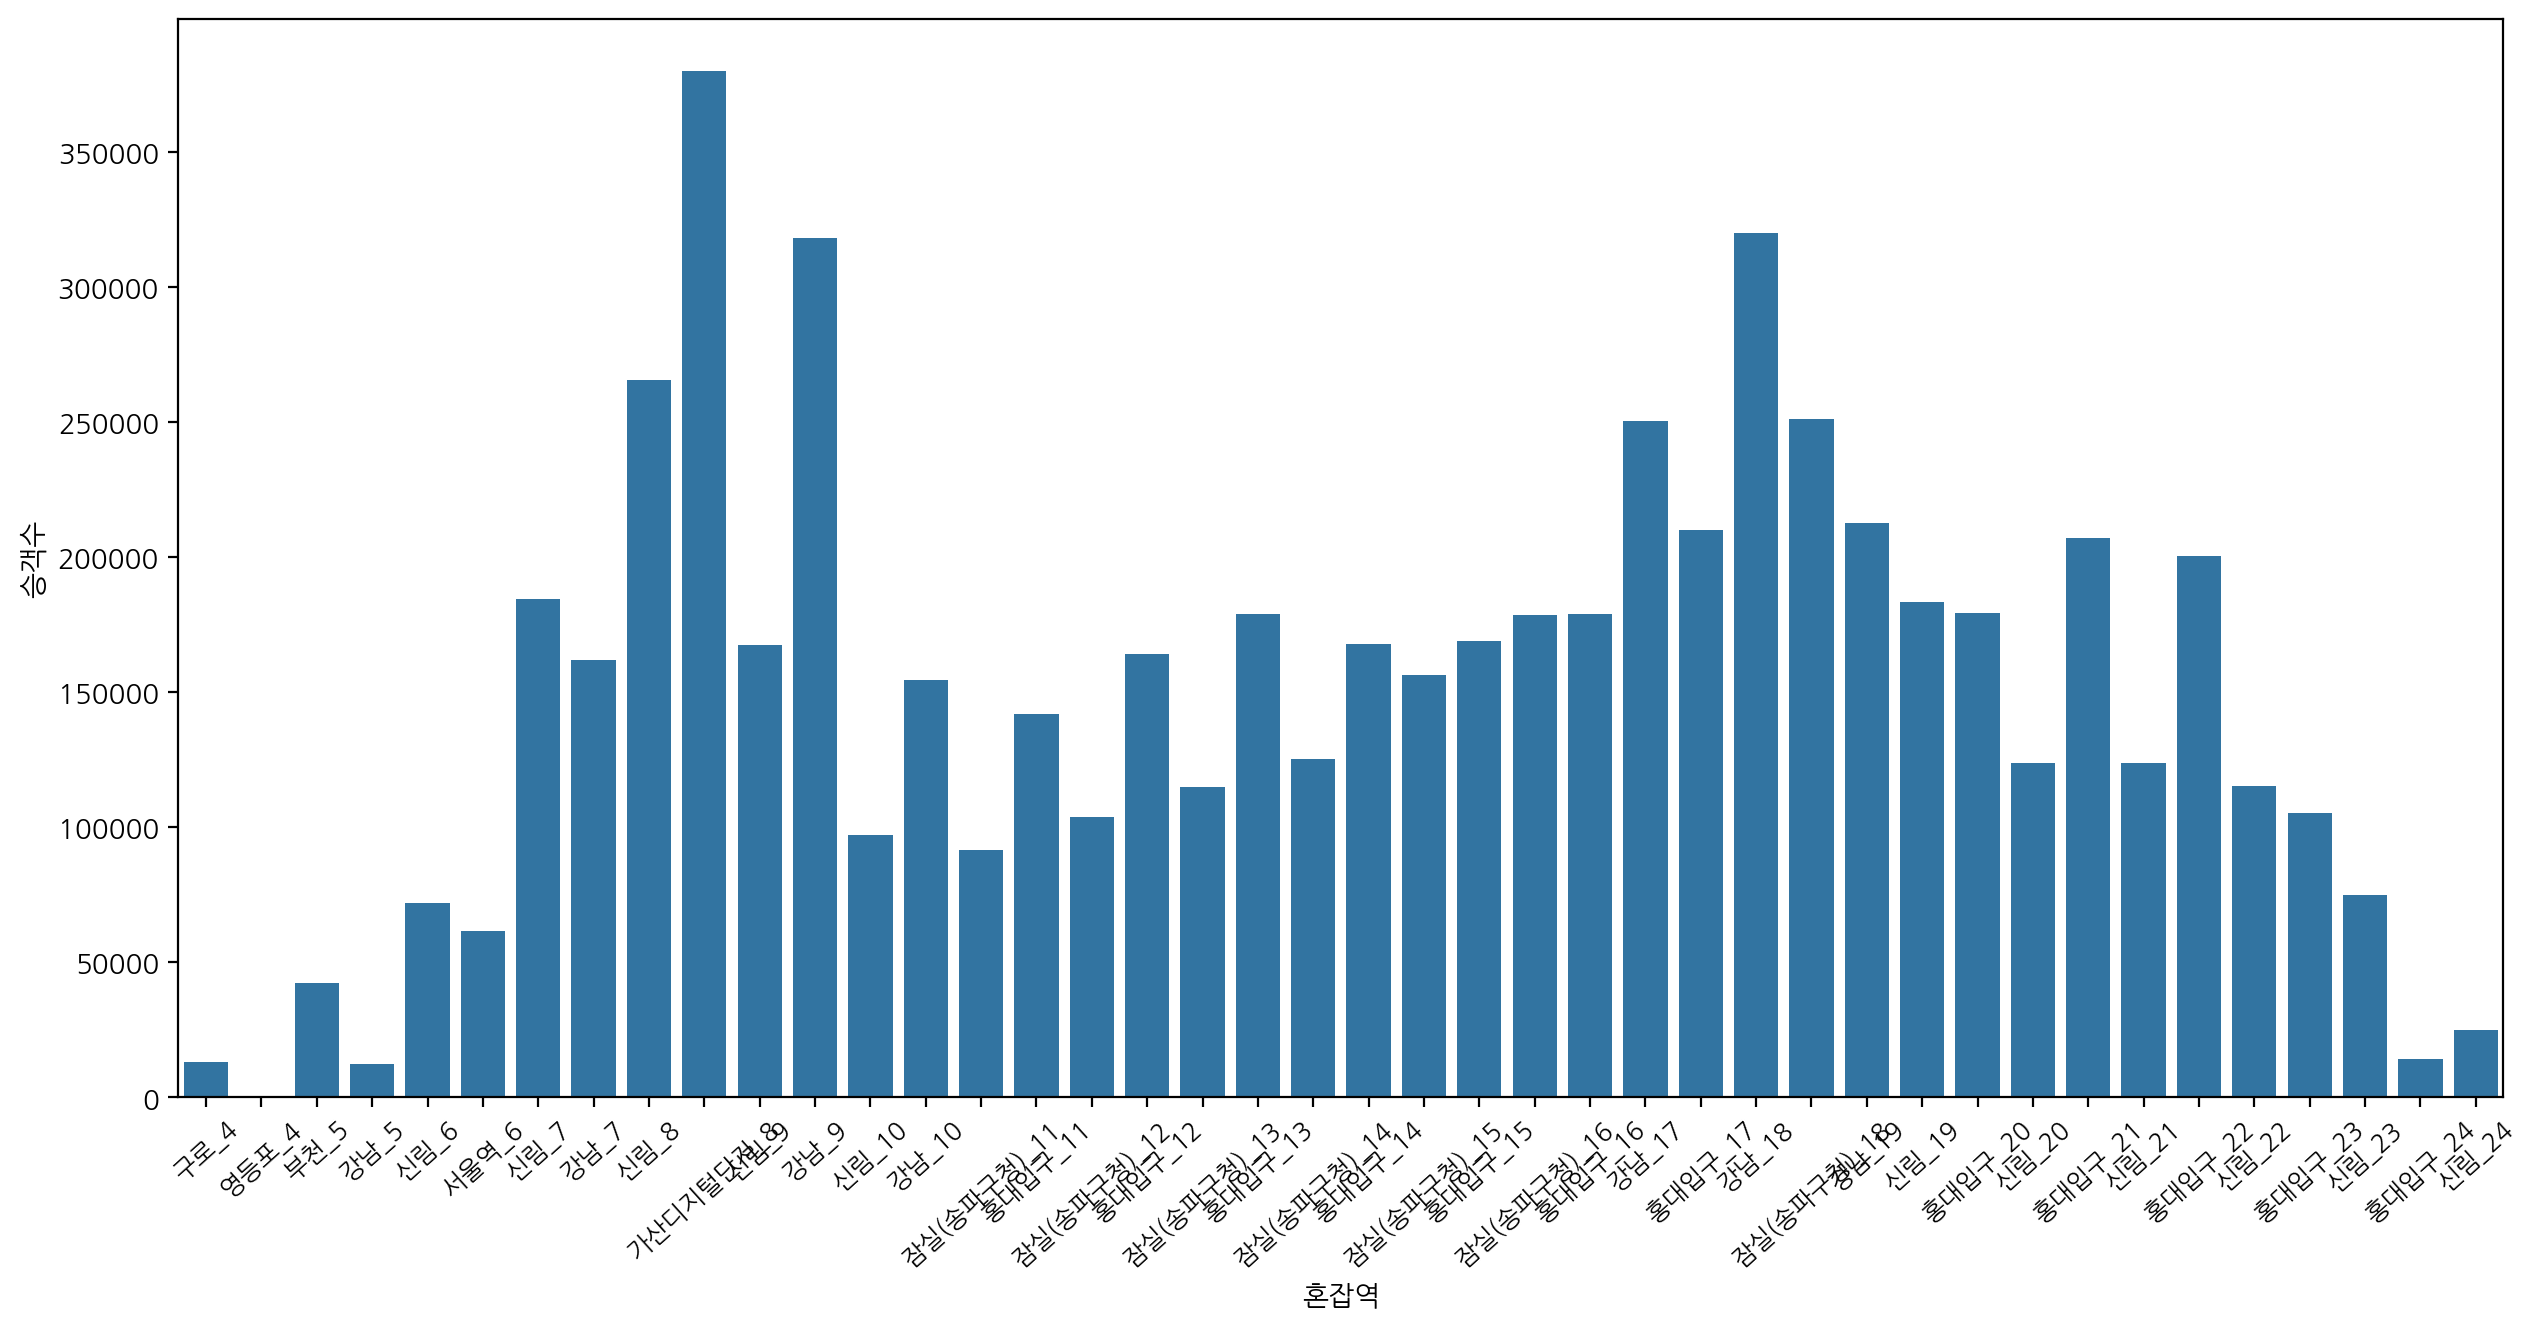

In [116]:
# seaborn 으로 그리기

plt.figure(figsize=(15,7))
ax = sns.barplot(x='혼잡역',y='승객수',data=df_passenger_max_time)
ax.set_xticklabels(df_passenger_max_time['혼잡역'],rotation=42,fontsize=9);

In [120]:
# 승차,하차 분리하기

df_max_in = df_passenger_max_time[df_passenger_max_time['승하차'].str.contains('승차')].copy()
df_max_out = df_passenger_max_time[df_passenger_max_time['승하차'].str.contains('하차')].copy()

In [122]:
df_max_in.head()
df_max_out.head()

,승하차,idx_max,승객수,지하철역,hour,혼잡역
1,하차_4,125,131,영등포,4,영등포_4
3,하차_5,31,12221,강남,5,강남_5
5,하차_6,0,61682,서울역,6,서울역_6
7,하차_7,31,161939,강남,7,강남_7
9,하차_8,520,380181,가산디지털단지,8,가산디지털단지_8


<Axes: xlabel='혼잡역'>

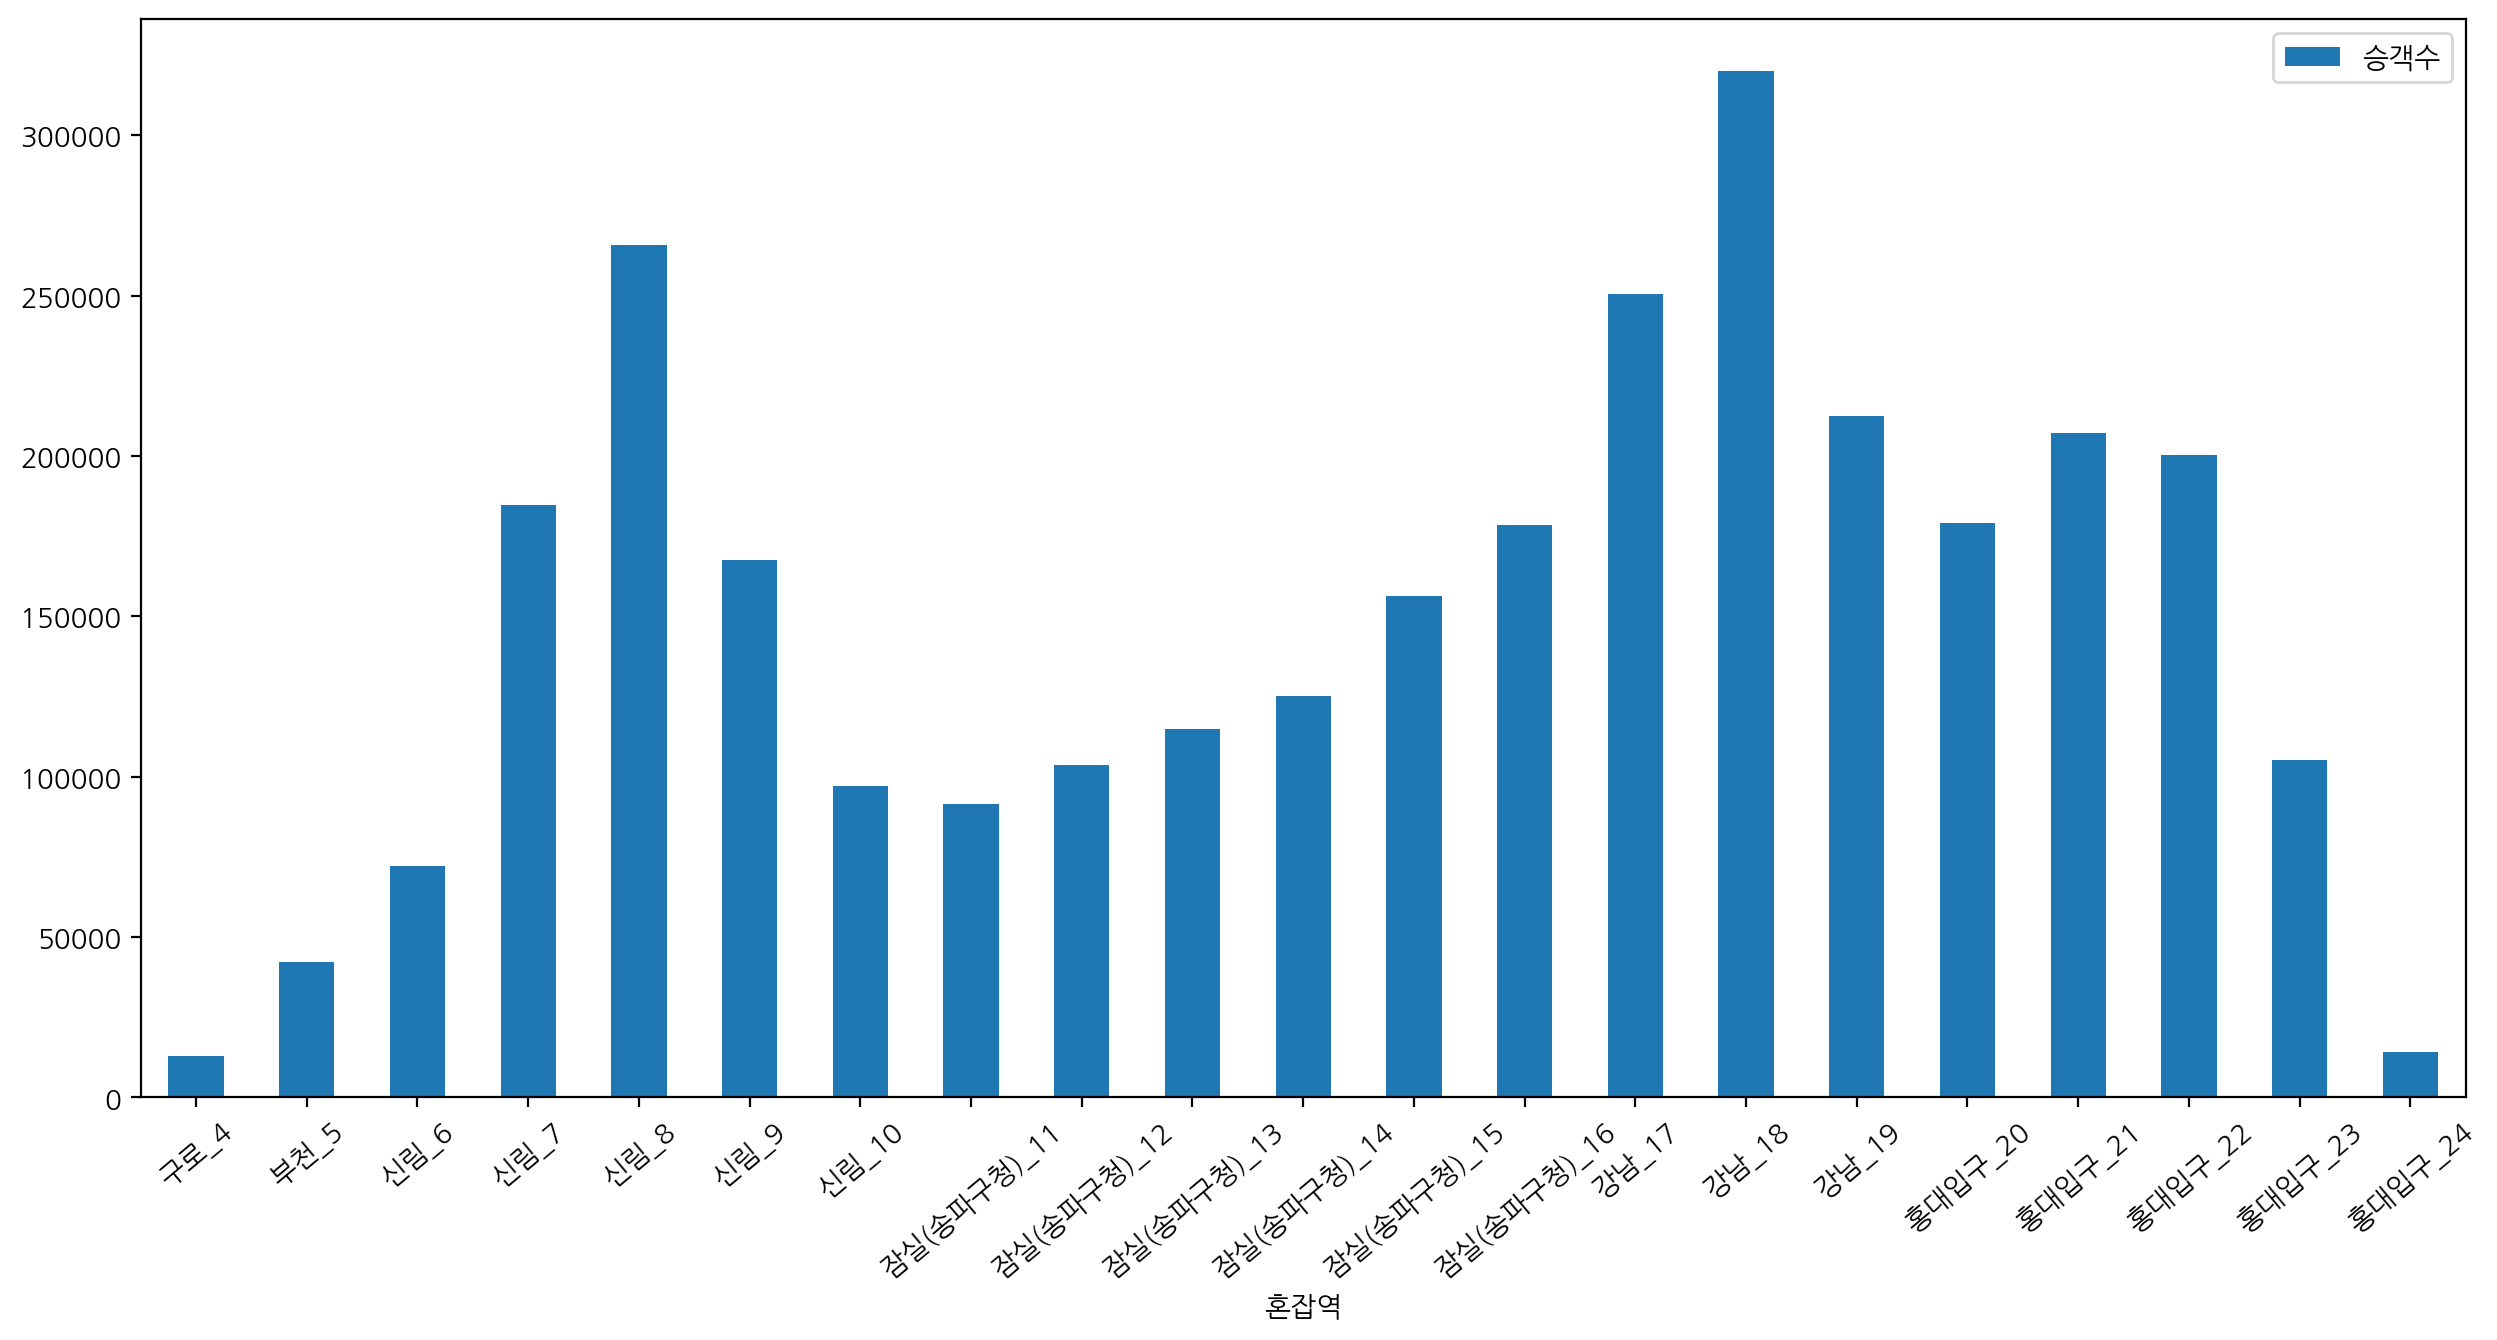

In [124]:
# 승차 그래프 그리기

df_max_in.plot.bar(x='혼잡역',y='승객수',figsize=(15,7),rot=40)

Text(0.5, 1.0, '하차 혼잡역')

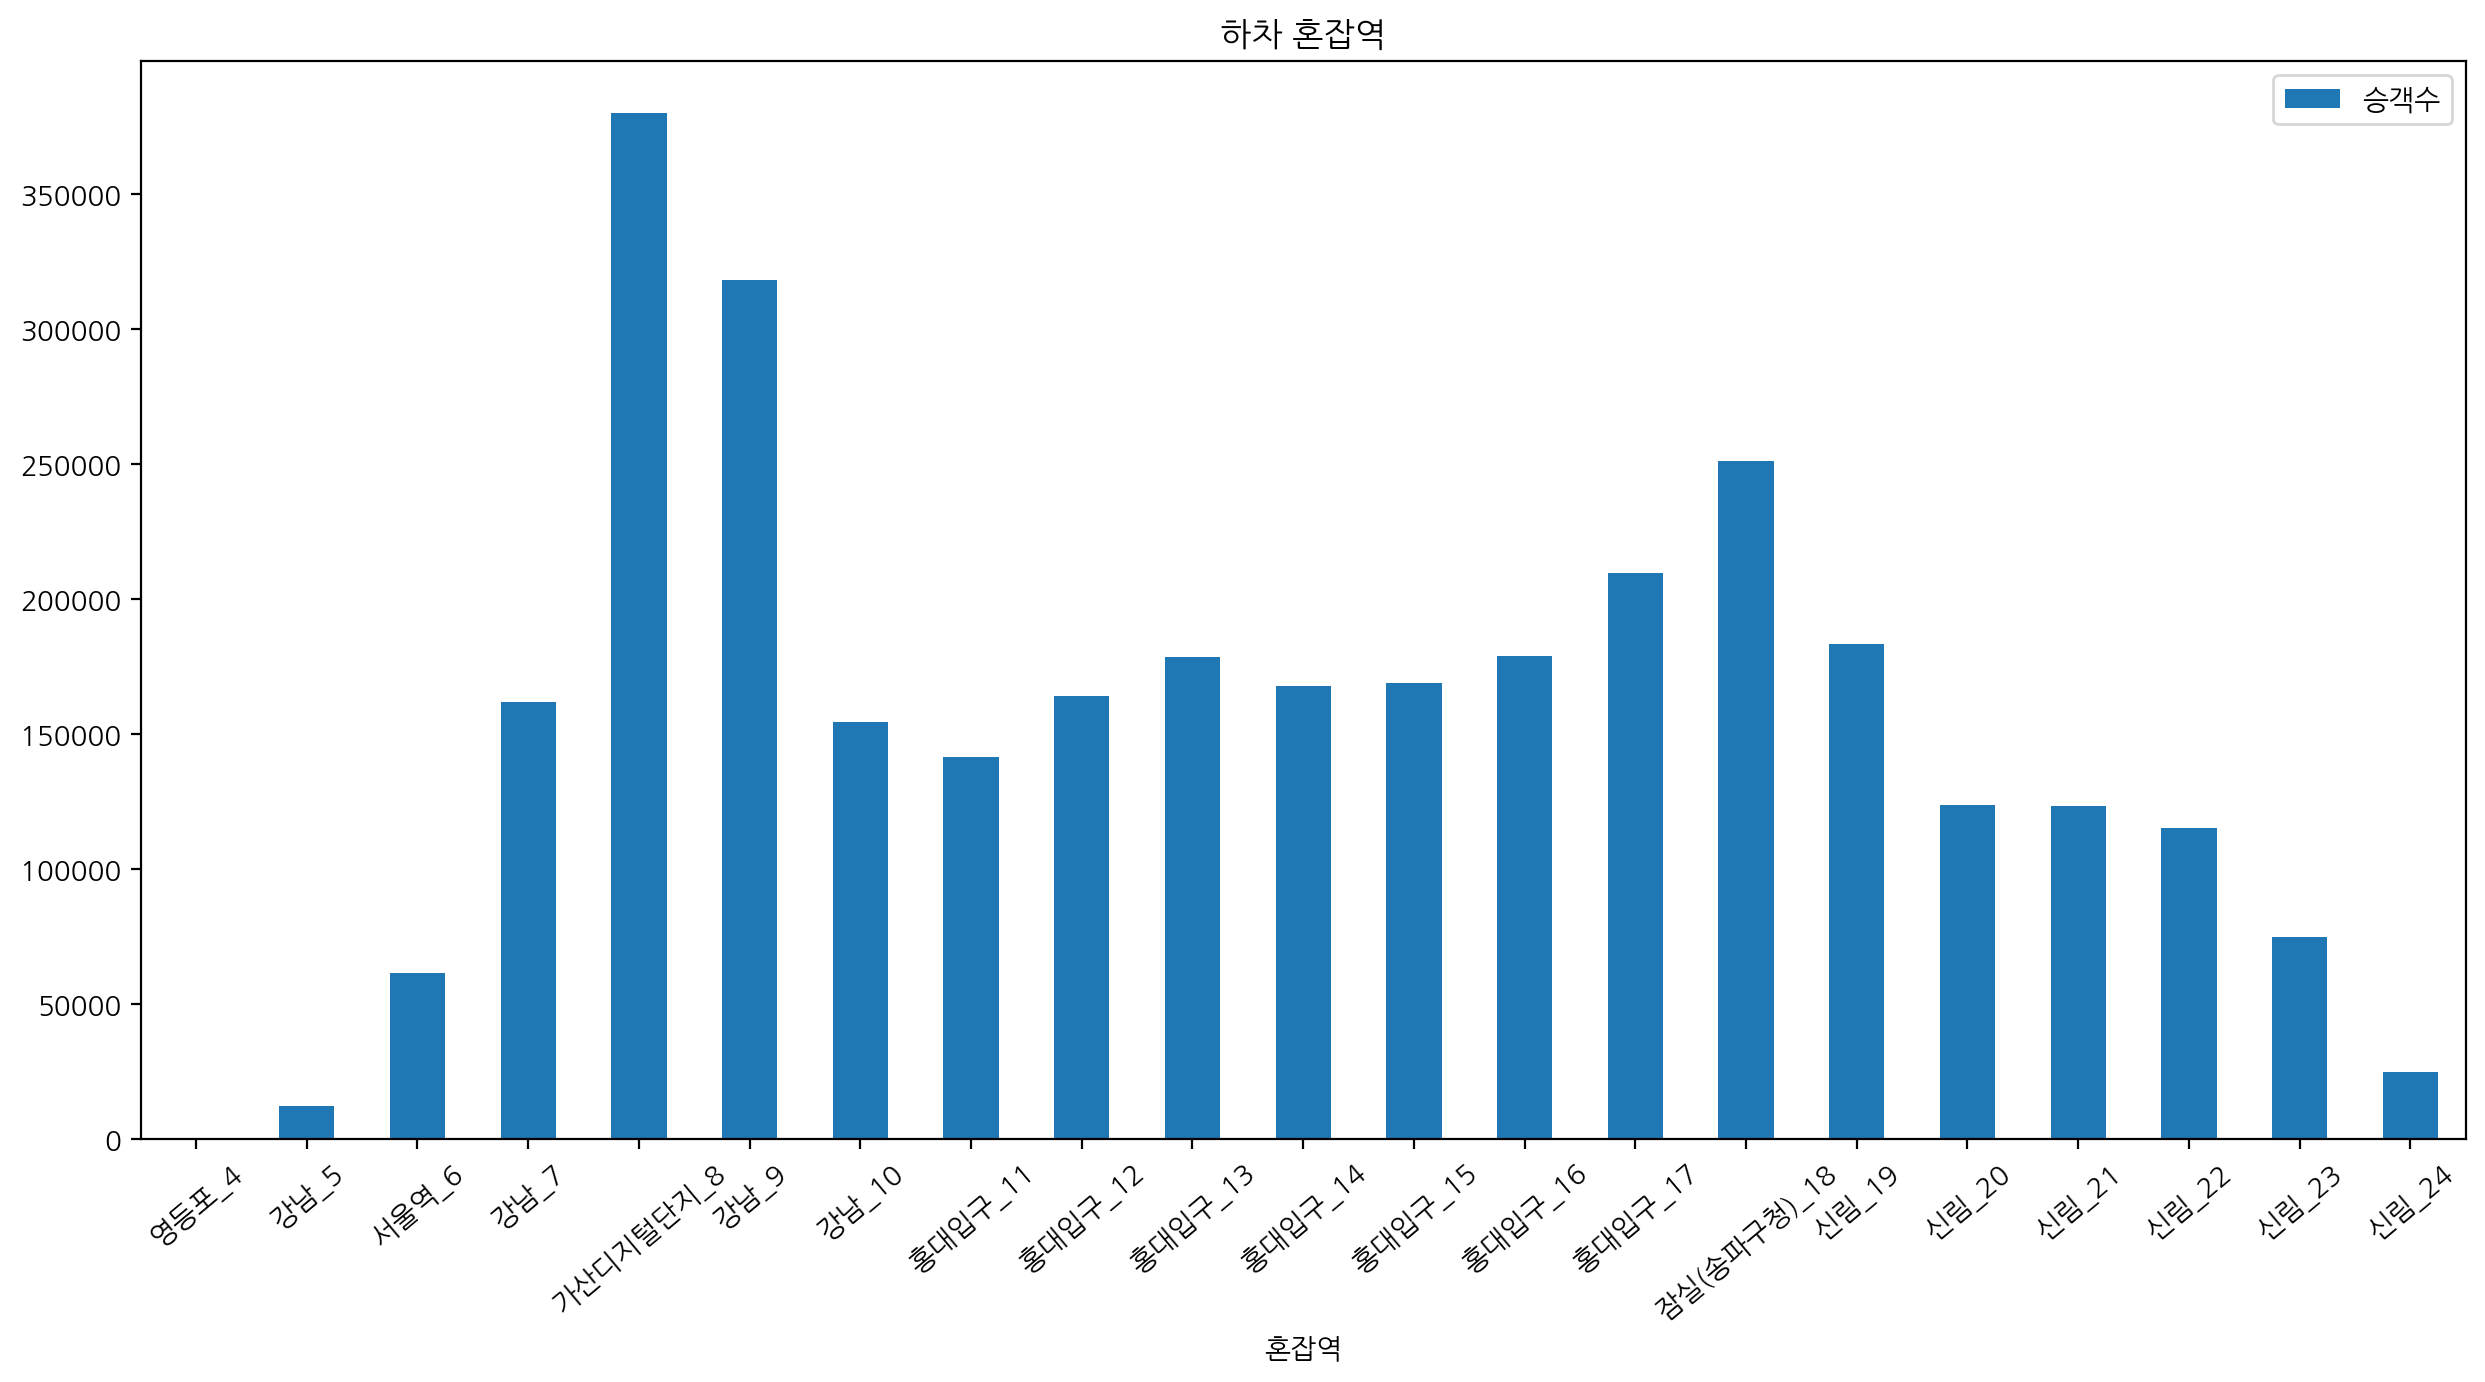

In [126]:
# 하차 그래프 그리기

df_max_out.plot.bar(x='혼잡역',y='승객수',figsize=(15,7),rot=40)
plt.title('하차 혼잡역')

In [127]:
# 혼잡역이 중복인 시간대가 많다

df_max_in['지하철역'].value_counts()

지하철역
잠실(송파구청)    6
신림          5
홍대입구        5
강남          3
구로          1
부천          1
Name: count, dtype: int64

Text(0.5, 1.0, '승차 시 가장 혼잡한 역')

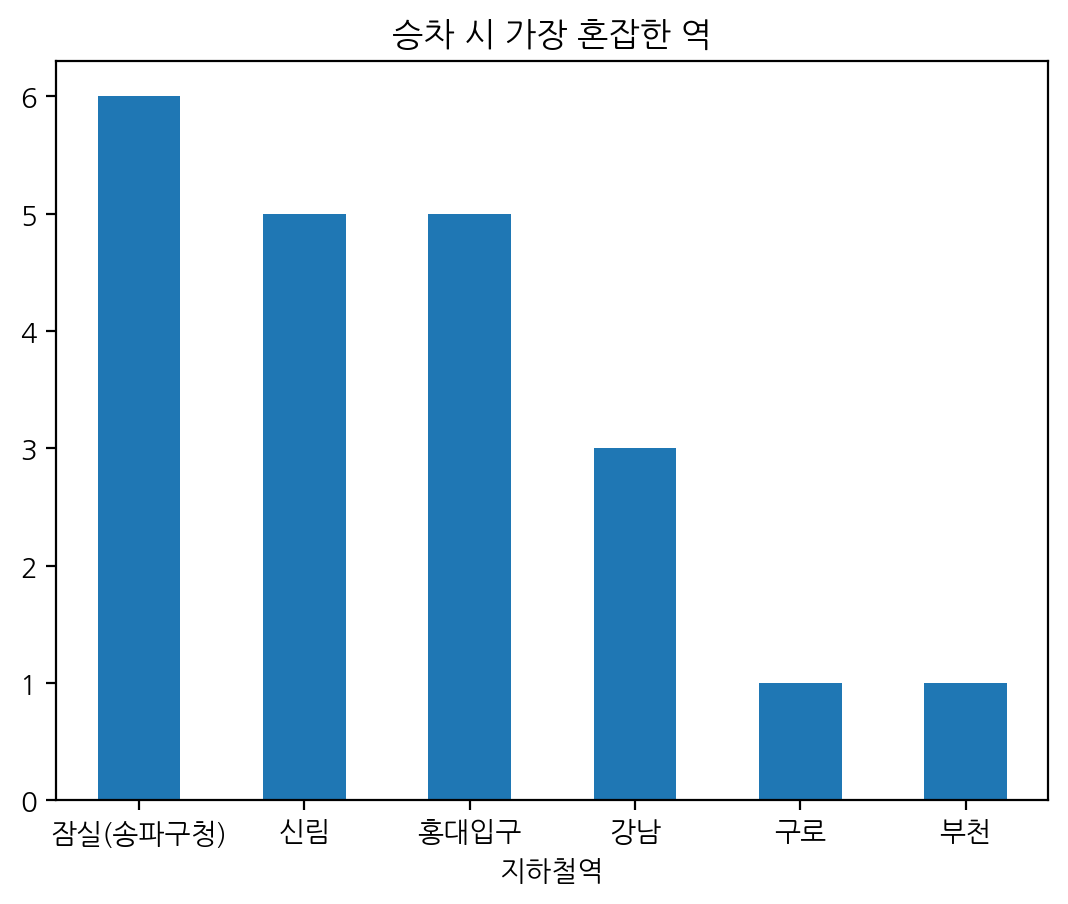

In [129]:
df_max_in['지하철역'].value_counts().plot.bar(rot=0)
plt.title('승차 시 가장 혼잡한 역')

<Axes: xlabel='지하철역', ylabel='count'>

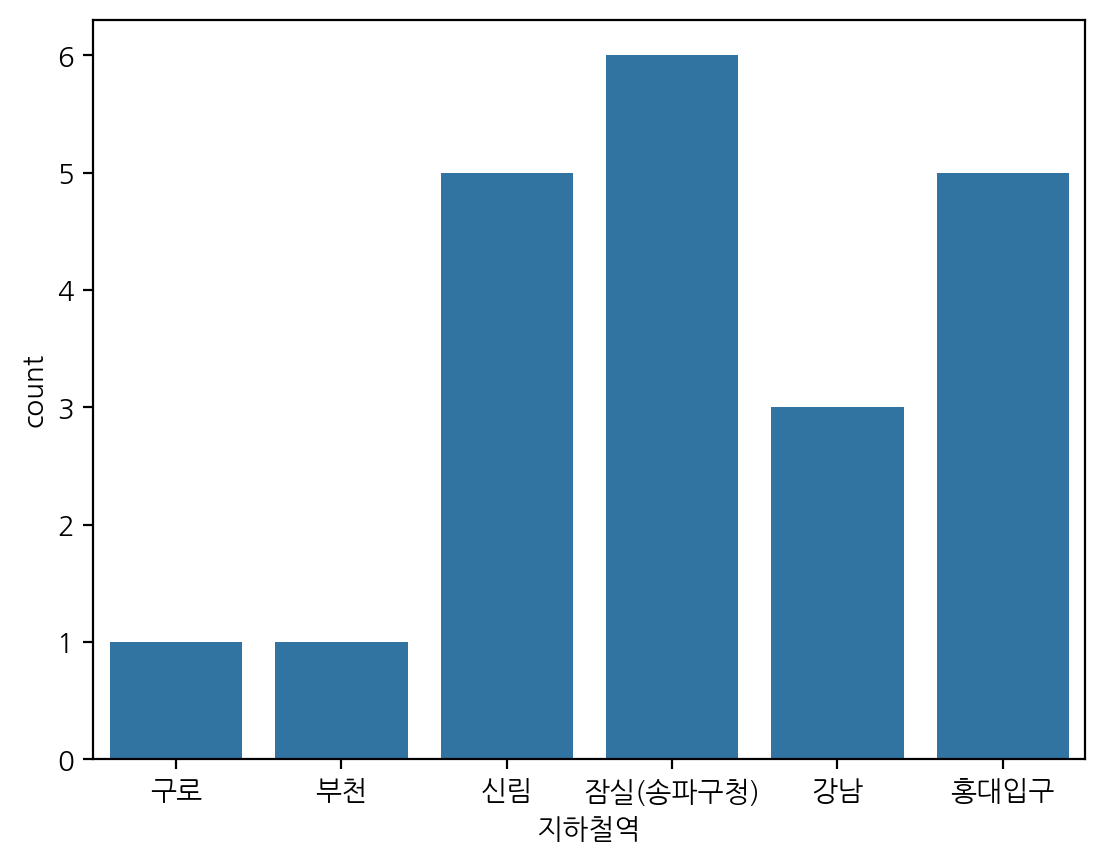

In [130]:
# df_max_in['지하철역'].value_counts()
# countplot() : seaborn 을 사용한다면

sns.countplot(data=df_max_in, x='지하철역')